# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

Numbers of remain columns 65


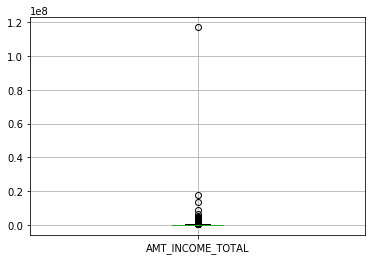

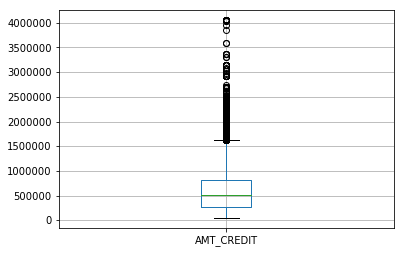

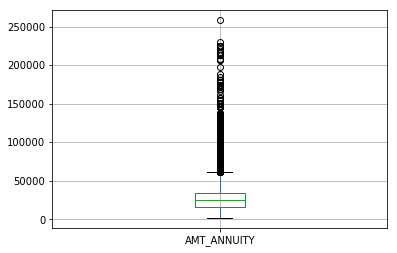

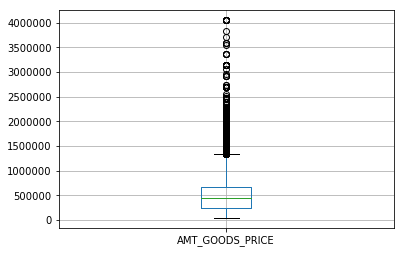

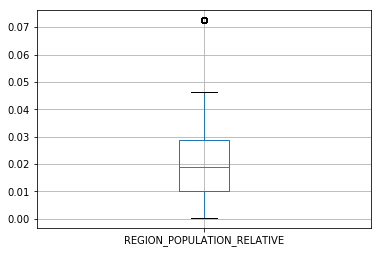

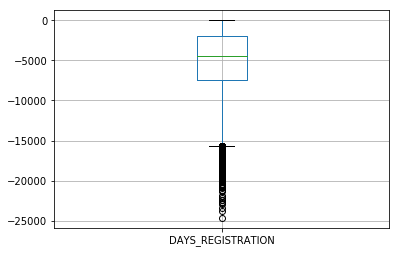

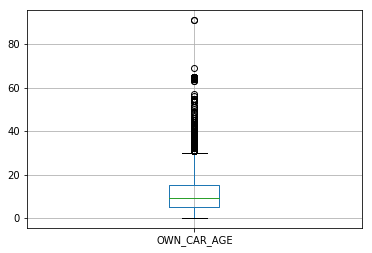

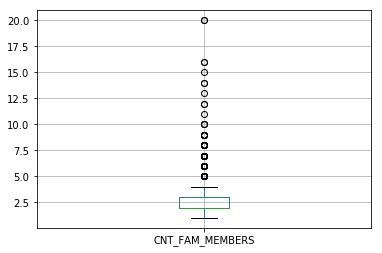

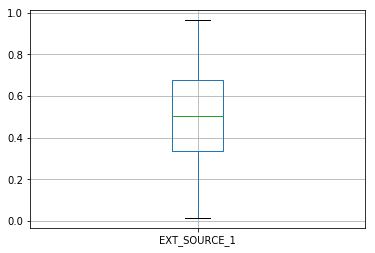

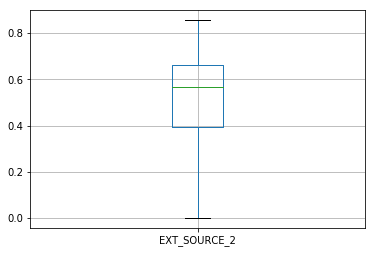

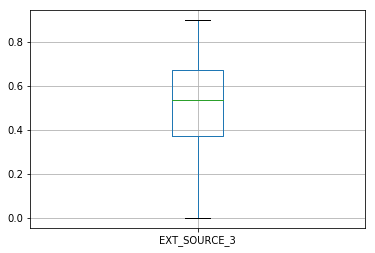

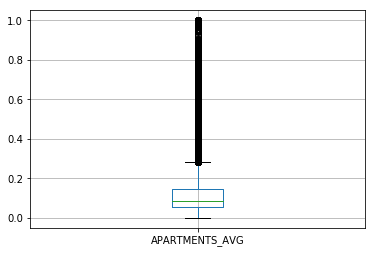

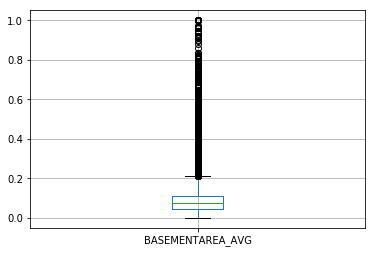

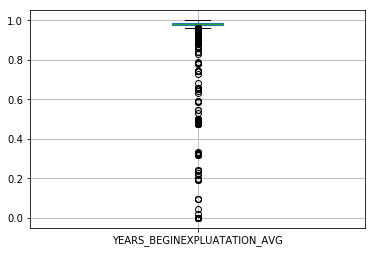

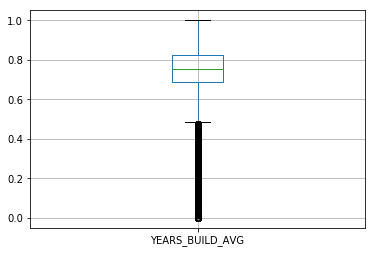

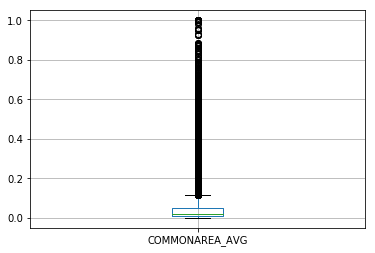

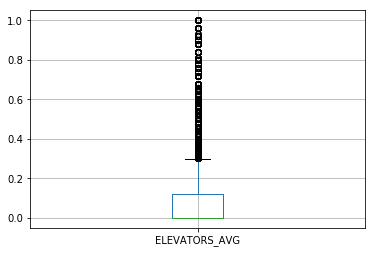

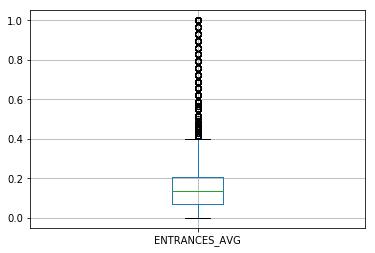

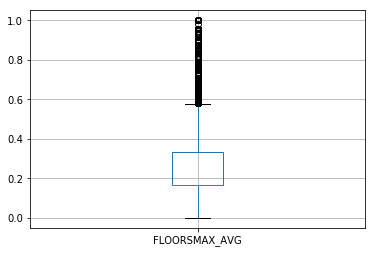

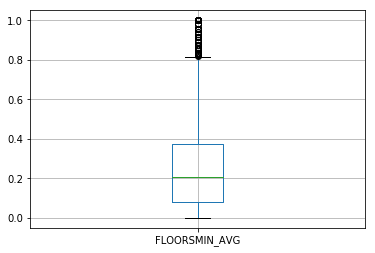

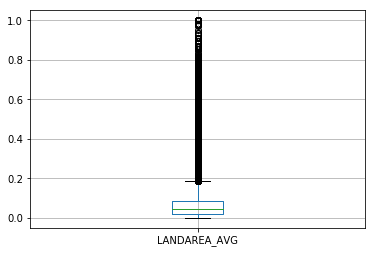

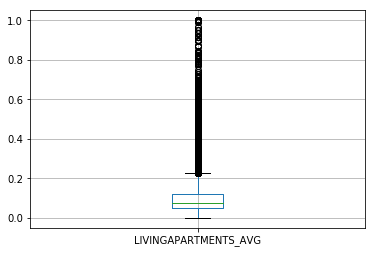

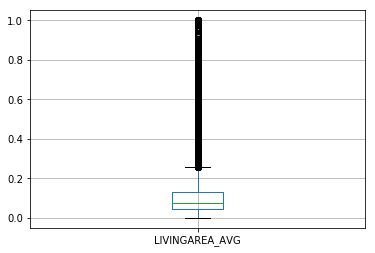

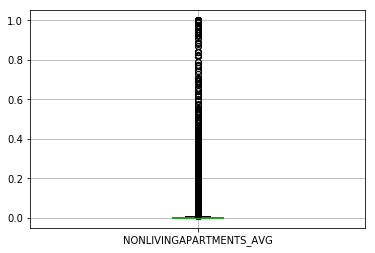

KeyboardInterrupt: 

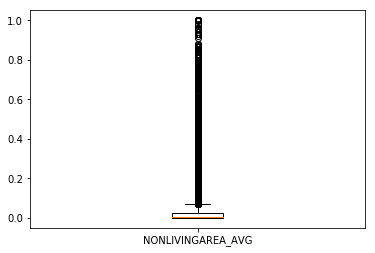

In [3]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""

dtype_select = [np.int64,np.float64]
#dtype_select = ['int64','float64']

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])


# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns %i" % len(numeric_columns))
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train.boxplot(col)
    plt.show()

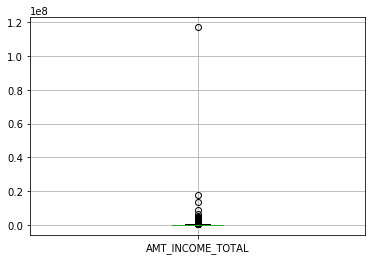

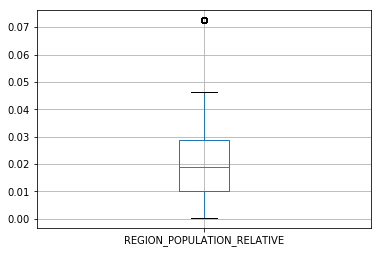

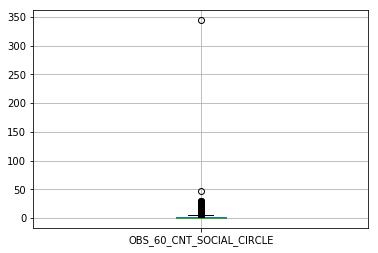

In [5]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE
app_train.boxplot('AMT_INCOME_TOTAL')
plt.show()
app_train.boxplot('REGION_POPULATION_RELATIVE')
plt.show()
app_train.boxplot('OBS_60_CNT_SOCIAL_CIRCLE')
plt.show()


### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [6]:
app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()

25650.00             2
26100.00             5
26460.00             6
26550.00             8
27000.00            74
27585.00            75
27900.00            82
27967.50            83
28161.00            84
28350.00            95
28404.00            96
28575.00            99
28593.00           100
28723.50           101
28800.00           104
29133.00           105
29250.00           137
29583.00           138
29700.00           141
30150.00           148
30600.00           154
30915.00           155
31050.00           156
31500.00           340
31531.50           341
31815.00           342
31860.00           343
31950.00           347
31990.50           348
32040.00           349
                 ...  
1358550.00      307423
1381500.00      307424
1417500.00      307425
1440000.00      307427
1530000.00      307428
1575000.00      307446
1665000.00      307447
1755000.00      307448
1800000.00      307462
1890000.00      307466
1935000.00      307467
2025000.00      307475
2070000.00 

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64


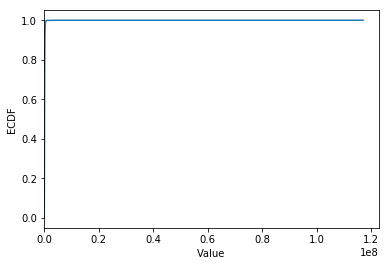

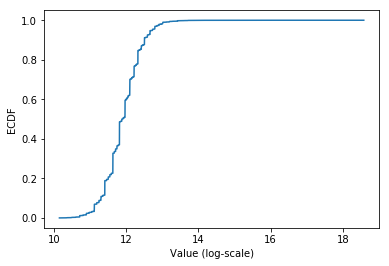

In [7]:
# 最大值離平均與中位數很遠
pd.set_option('display.float_format',lambda x : '%.2f' % x)
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count   307511.00
mean         0.02
std          0.01
min          0.00
25%          0.01
50%          0.02
75%          0.03
max          0.07
Name: REGION_POPULATION_RELATIVE, dtype: float64


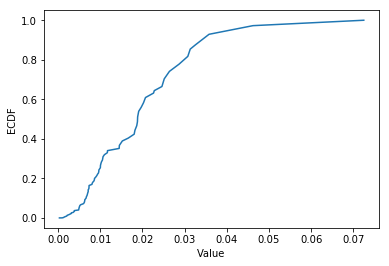

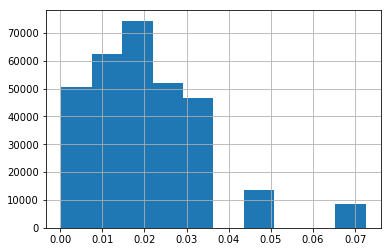

0.04    16408
0.05    13442
0.03    12163
0.03    11950
0.03    11601
0.03    11321
0.03    11157
0.02     8694
0.07     8412
0.02     8066
0.02     7668
0.02     7178
0.02     7038
0.02     6943
0.02     6824
0.03     6636
0.02     6404
0.02     6172
0.02     6167
0.02     6108
0.02     6052
0.01     4785
0.02     4408
0.01     4105
0.02     3807
0.01     3570
0.01     3563
0.01     3422
0.00     3300
0.01     3252
        ...  
0.01     1796
0.00     1783
0.01     1763
0.01     1740
0.01     1724
0.01     1684
0.01     1672
0.01     1668
0.01     1654
0.01     1653
0.00     1642
0.00     1616
0.01     1482
0.01     1225
0.01     1218
0.00     1212
0.00     1147
0.01     1087
0.01     1068
0.00     1051
0.00     1038
0.01      967
0.00      944
0.00      627
0.00      558
0.00      467
0.00      235
0.00       39
0.00       28
0.00        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [8]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count   306490.00
mean         1.41
std          2.38
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


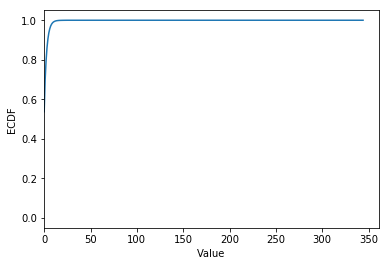

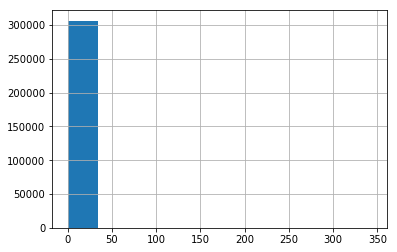

344.00         1
47.00          1
30.00          1
29.00          2
28.00          1
27.00          5
26.00          1
25.00         11
24.00         12
23.00         13
22.00         20
21.00         28
20.00         30
19.00         44
18.00         49
17.00         73
16.00        137
15.00        166
14.00        238
13.00        401
12.00        620
11.00        837
10.00       1335
9.00        1959
8.00        2886
7.00        4344
6.00        6349
5.00        9463
4.00       13946
3.00       20215
2.00       29766
1.00       48870
0.00      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [9]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

"""
cdf = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

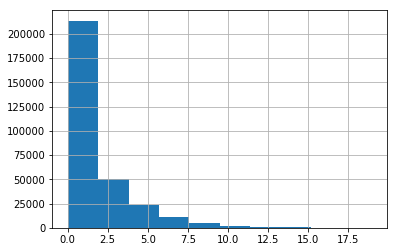

In [13]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()